In [73]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv('data/fake_users_data.csv')

In [75]:
routes_dictionary ={'Arbres monumentals i singulars':0,
                    'Arbres: La volta al món':1,
                    'Arbres: Els indians':2,
                    'Arbres: Un passeig per l’Albereda':3,
                    'Arbres: Un viatge pel Mediterrani':4,
                    'Ruta Carrer Russafa - la Llotja':5,
                    'Contes Blasco Ibañez – Ruta 1':6,
                    'Contes Blasco Ibañez – Ruta 2':7,
                    'Entre Naranjos':8,
                    'Glorieta-Santa Catalina':9,
                    'Jardins del Reial - Glorieta':10,
                    'La barraca':11,
                    'Ruta Cultural Anell Ciclista':12,
                    'Ruta de la Seda':13,
                    "Ruta dels Pecats a l'entorn del Mercat Central":14,
                    'Ruta pel Centre Històric':15,
                    "Ruta recinte enmurallat d'època islàmica":16,
                    'Ruta València amb bicicleta':17,
                    'Sant Agustí – Pont de Fusta':18,
                    'Sant Agustí - Portal Nou':19,
                    'Serrans - Palau de la Generalitat':20,
                    'Torres de Quart - Temple':21,
                    "Trinitat - L'Almodí":22,
                    'Ruta Valencia en la Memòria':23}

In [76]:
df['route_id'] = df['route'].map(routes_dictionary)

In [77]:
df = pd.get_dummies(df, prefix=['age', 'gender', 'type', 'diff', 'comp', 'trans'], columns=['age', 'gender', 'type_route', 'difficulty','accompaniment', 'transport'])

In [78]:
X = df.drop(columns=['route', 'route_id'], axis=1)
y = df[['route_id']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

c:\Users\Paris\anaconda3\envs\desafio\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
y_pred

array([ 9, 22,  9, ...,  0, 17, 22], dtype=int64)

In [82]:
accuracy_score(y_test, y_pred)

0.7458333333333333

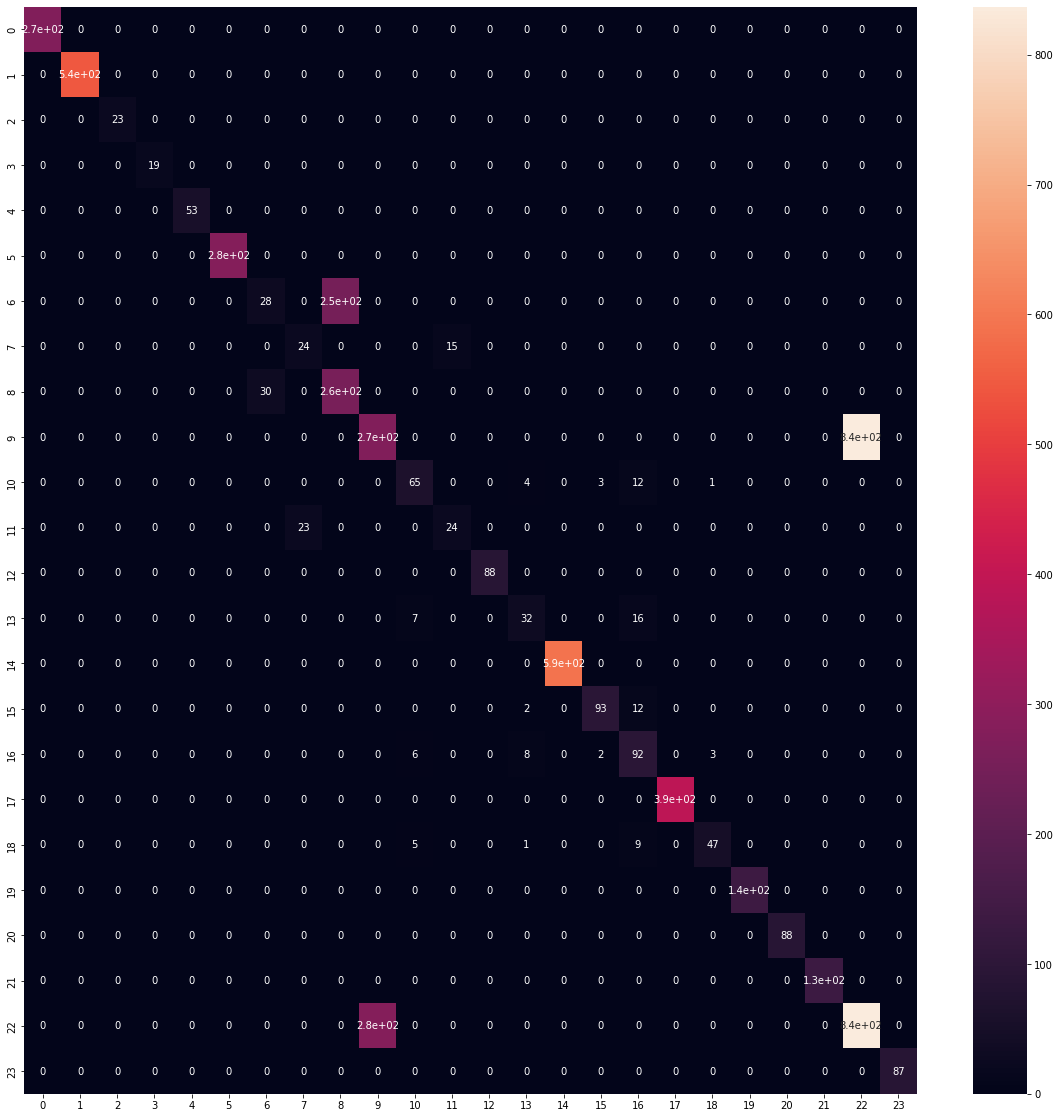

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [84]:
# Guardar modelo
filename = 'model/finished_model.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(mlp, archivo_salida)